In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [2]:

model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = .36/5
hours = 50
time_in_seconds = 10#12878#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 10000))


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


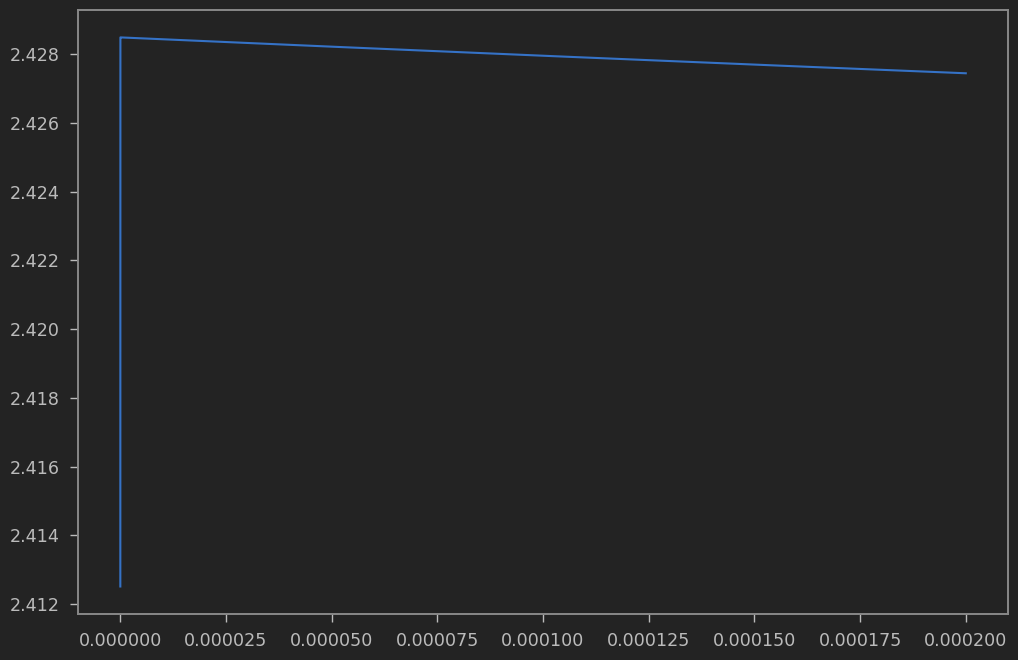

In [3]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
notify

In [4]:
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[-1]
S6_initial = sim1.solution['S6 [g]'].entries[-1]
S4_initial = sim1.solution['S4 [g]'].entries[-1]
S2_initial = sim1.solution['S2 [g]'].entries[-1]
S_initial = sim1.solution['S [g]'].entries[-1]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[-1]
V_initial = sim1.solution['Terminal voltage [V]'].entries[-1]

In [5]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 1
    time_in_seconds = 1000#hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            
            #"Precipitation rate [s-1]": 1
        }
    )
    params.process_model(model)
    sim1 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim1.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

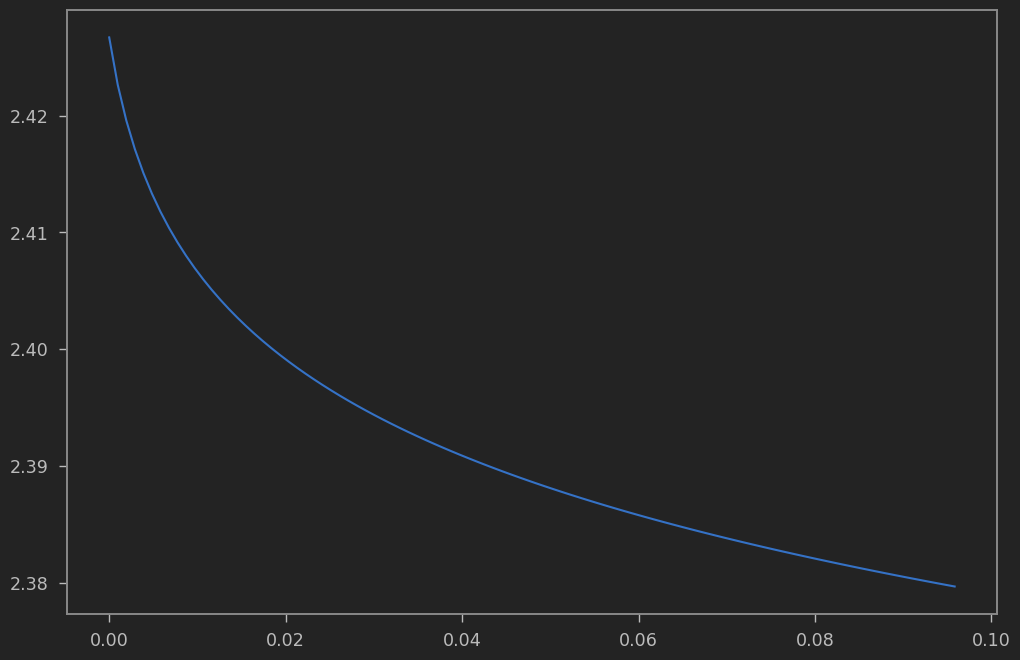

In [6]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
notify

In [7]:
indices = np.where(voltage <= 2.4)
loc = indices[0][0]
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[loc]
S6_initial = sim1.solution['S6 [g]'].entries[loc]
S4_initial = sim1.solution['S4 [g]'].entries[loc]
S2_initial = sim1.solution['S2 [g]'].entries[loc]
S_initial = sim1.solution['S [g]'].entries[loc]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial = sim1.solution['Terminal voltage [V]'].entries[loc]

In [8]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 10
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Precipitation rate [s-1]": 5,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.0,
            "Standard Potential L [V]": 2.0,
            "Standard Potential H [V]": 2.38,
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim1 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim1.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

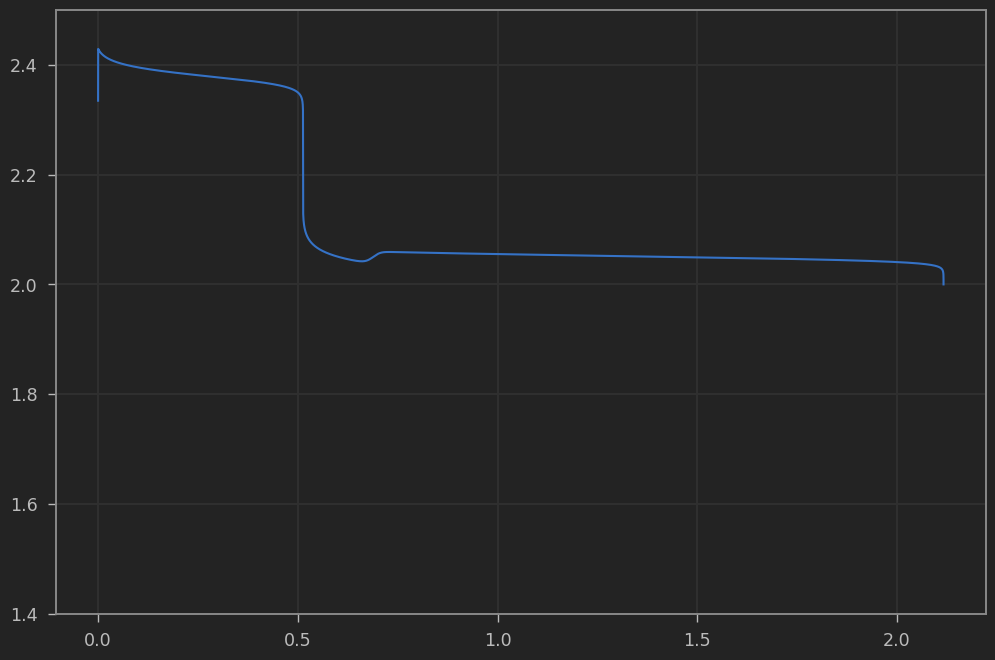

In [9]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [10]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 10
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Precipitation rate [s-1]": 5,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.0,
            "Standard Potential L [V]": 2.0,
            "Standard Potential H [V]": 2.38,
            'Ambient Temperature [K]': 292
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim292 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim292.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [12]:
voltage292 = sim292.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim292.solution.t/3600,voltage292)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

TypeError: 'NoneType' object is not subscriptable

In [12]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 10
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Precipitation rate [s-1]": 5,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.0,
            "Standard Potential L [V]": 2.0,
            "Standard Potential H [V]": 2.38,
            'Ambient Temperature [K]': 302
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim302 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim302.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 4755.99 and h

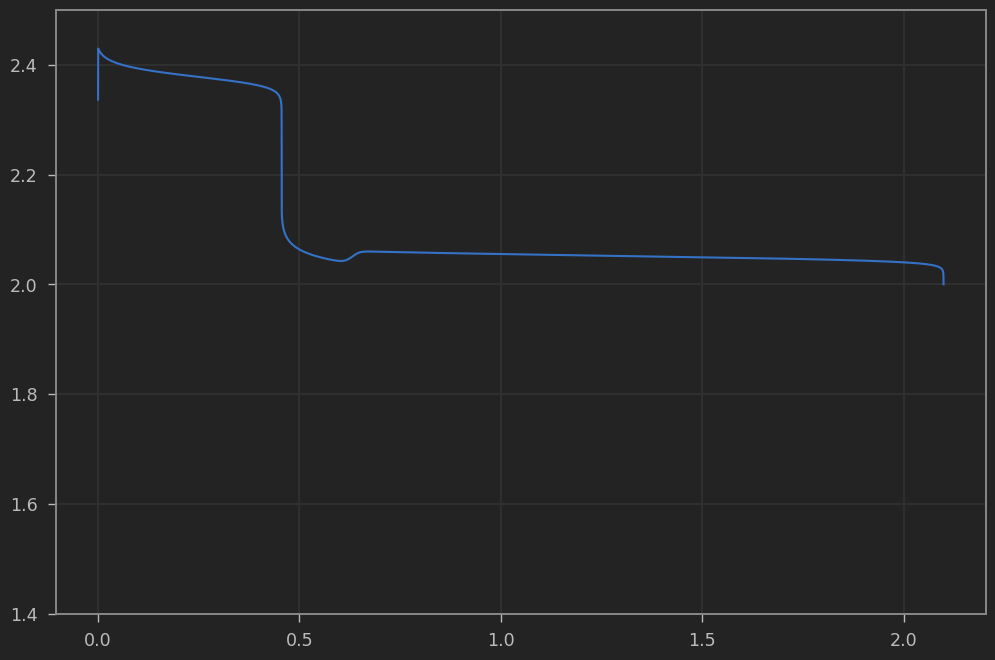

In [13]:
voltage302 = sim302.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim302.solution.t/3600,voltage302)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [14]:
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 10
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Precipitation rate [s-1]": 5,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.0,
            "Standard Potential L [V]": 2.0,
            "Standard Potential H [V]": 2.38,
            'Ambient Temperature [K]': 312
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim312 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim312.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

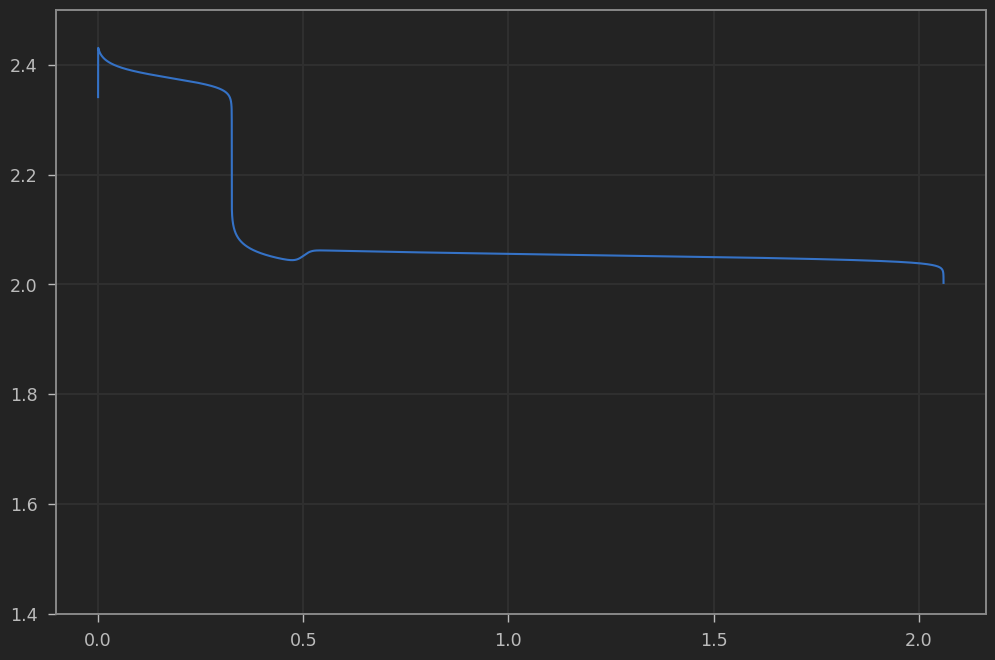

In [15]:
voltage312 = sim312.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim312.solution.t/3600,voltage312)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [13]:
S8_initial_g = S8_initial
S6_initial_g = S6_initial
S4_initial_g = S4_initial
S2_initial_g = S2_initial
S1_initial_g = S_initial
Sp_initial_g = Sp_initial

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168*1.5

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [14]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = 2*0.0211
hours = 10
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Precipitation rate [s-1]": 5,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.35,
        "Ambient Temperature [K]" : 302
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_302 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_302.solve(np.linspace(0, time_in_seconds, 100))


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 4056.31 and h

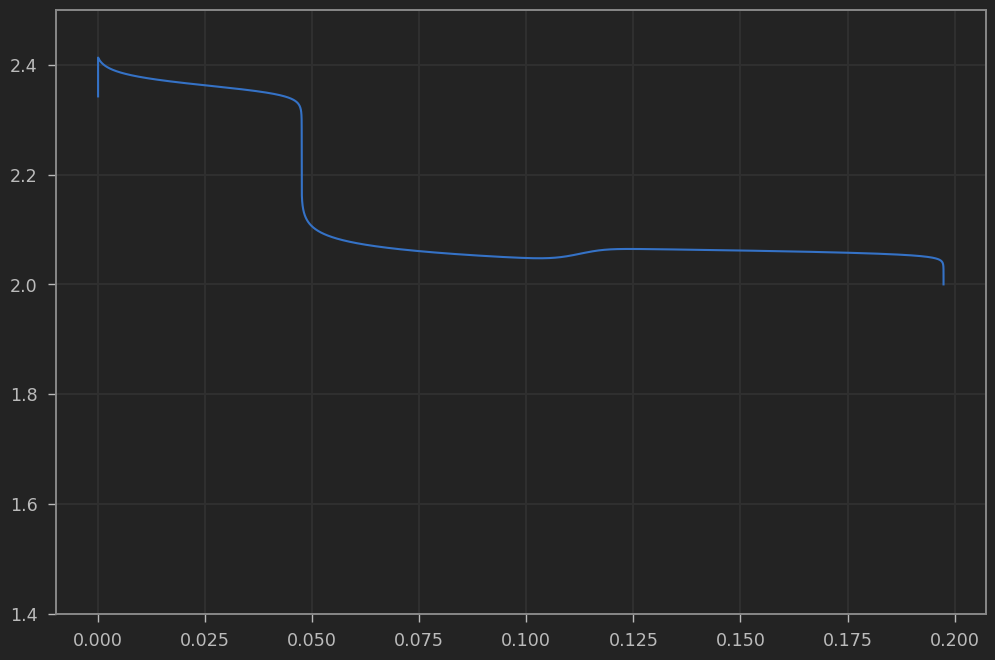

In [15]:
voltage_hunt_302 = sim_hunt_302.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_302.solution.t/3600,voltage_hunt_302)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [21]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = 2*0.0211
hours = 10
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Precipitation rate [s-1]": .5,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.35,
        "Ambient Temperature [K]" : 312
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_312 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_312.solve(np.linspace(0, time_in_seconds, 100))


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


SystemError: <built-in function integrator> returned a result with an error set

In [ ]:
voltage_hunt_312 = sim_hunt_312.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_312.solution.t/3600,voltage_hunt_312)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [13]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = 2*0.0211
hours = 10
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Precipitation rate [s-1]": 5,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.35,
        "Ambient Temperature [K]" : 292
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim_hunt_292 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim_hunt_292.solve(np.linspace(0, time_in_seconds, 100))


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

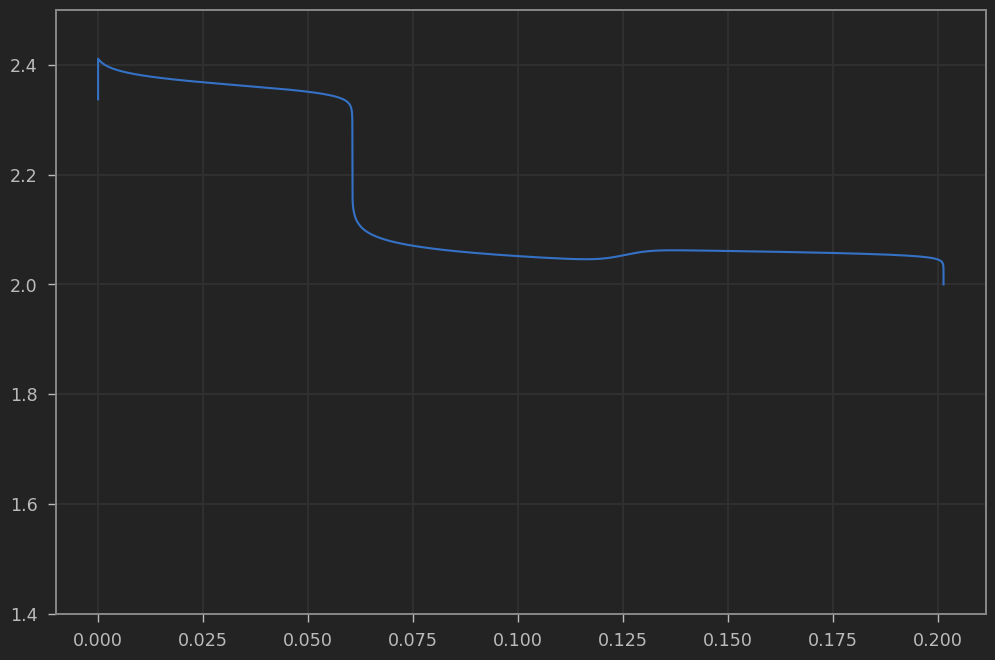

In [14]:
voltage_hunt_292 = sim_hunt_292.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_292.solution.t/3600,voltage_hunt_292)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

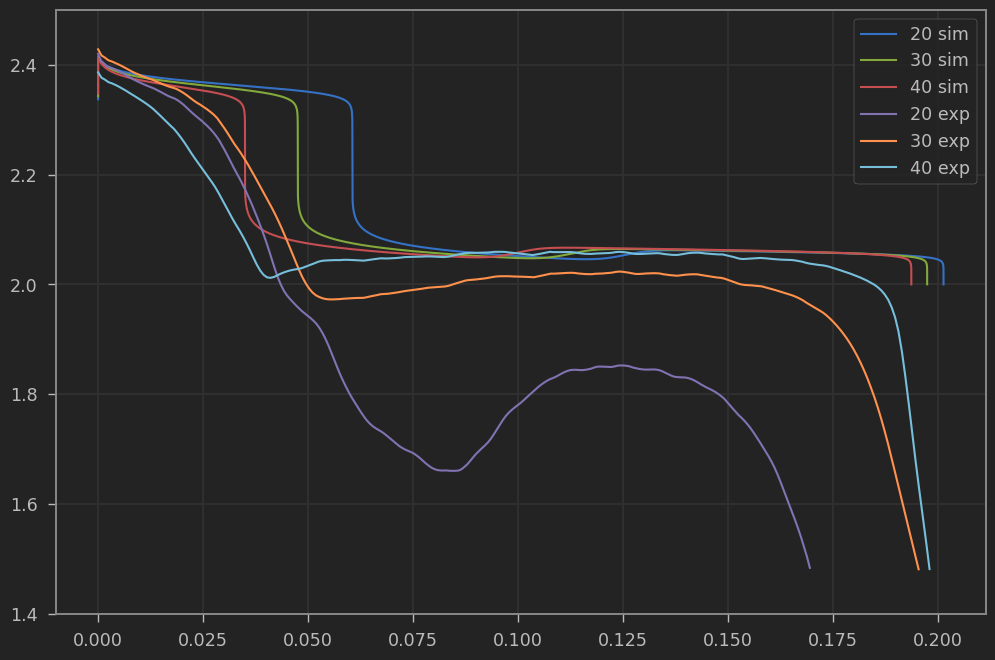

In [15]:
voltage_hunt_292 = sim_hunt_292.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_292.solution.t/3600,voltage_hunt_292)
voltage_hunt_302 = sim_hunt_302.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_302.solution.t/3600,voltage_hunt_302)
voltage_hunt_312 = sim_hunt_312.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim_hunt_312.solution.t/3600,voltage_hunt_312)


# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

temp_list = list(discharge_data.keys())

plt.plot(discharge_data['20']['capacity'],discharge_data['20']['internal voltage'])
plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])
plt.plot(discharge_data['40']['capacity'],discharge_data['40']['internal voltage'])


plt.ylim([1.4,2.5])
plt.grid(True)
plt.legend(['20 sim','30 sim','40 sim','20 exp','30 exp','40 exp',])

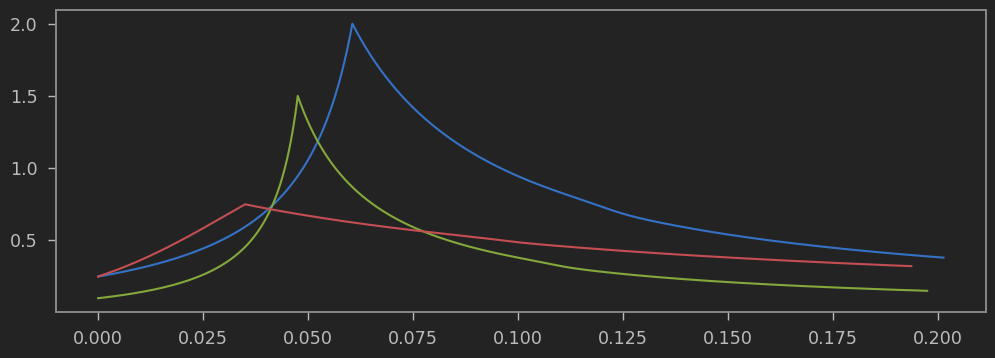

In [33]:
# resistance plots (proportionally)
sigma0 = 2e-3
b = 4.6e-7
plt.rcParams['figure.figsize'] = [12, 4]

S6_292 = sim_hunt_292.solution["S6 [g]"].entries
S4_292 = sim_hunt_292.solution["S4 [g]"].entries
S2_292 = sim_hunt_292.solution["S2 [g]"].entries
S1_292 = sim_hunt_292.solution["S [g]"].entries
Li_292 = 6*S6_292 + 4*S4_292 + 2*S2_292 + S1_292
X0 = min(Li_292)
X1 = max(Li_292)
A0 = .25
A1 =  2.0
gamma = ((1/A0)-(1/A1))/(X1-X0)
beta = (1/A0) + gamma*X0
sigma_292 = beta - gamma*Li_292
R_292 = 1/sigma_292
plt.plot(abs(current)*sim_hunt_292.solution.t/3600,R_292)

S6_302 = sim_hunt_302.solution["S6 [g]"].entries
S4_302 = sim_hunt_302.solution["S4 [g]"].entries
S2_302 = sim_hunt_302.solution["S2 [g]"].entries
S1_302 = sim_hunt_302.solution["S [g]"].entries
Li_302 = 6*S6_302 + 4*S4_302 + 2*S2_302 + S1_302
X0 = min(Li_302)
X1 = max(Li_302)
A0 = .1
A1 =  1.5
gamma = ((1/A0)-(1/A1))/(X1-X0)
beta = (1/A0) + gamma*X0
sigma_302 = beta - gamma*Li_302
R_302 = 1/sigma_302
plt.plot(abs(current)*sim_hunt_302.solution.t/3600,R_302)

S6_312 = sim_hunt_312.solution["S6 [g]"].entries
S4_312 = sim_hunt_312.solution["S4 [g]"].entries
S2_312 = sim_hunt_312.solution["S2 [g]"].entries
S1_312 = sim_hunt_312.solution["S [g]"].entries
Li_312 = 6*S6_312 + 4*S4_312 + 2*S2_312 + S1_312
X0 = min(Li_312)
X1 = max(Li_312)
A0 = .25
A1 =  .75
gamma = ((1/A0)-(1/A1))/(X1-X0)
beta = (1/A0) + gamma*X0
sigma_312 = beta - gamma*(Li_312)
R_312 = 1/sigma_312
plt.plot(abs(current)*sim_hunt_312.solution.t/3600,R_312)

In [20]:
plt.plot(abs(current)*sim_hunt_292.solution.t/3600,(1/6)*S6_302 + (1/4)*S4_302 + (1/2)*S2_302 + S1_302)

NameError: name 'sim_hunt_292' is not defined

In [ ]:
def smooth(data):
    '''
    Smooth data in the same way as the matlab function
    '''
    smooth_data = []
    index = len(data)
    for i in range(0,index):
        if i == 0 or i == index-1:
            smooth_data.append(data[i])
        elif i == 1 or i == index-2:
            smooth_data.append((data[i-1]+data[i]+data[i+1])/3)
        else:
            smooth_data.append((data[i-2]+data[i-1]+data[i]+data[i+1]+data[i+2])/5)
    return smooth_data

def Resistance(filename):
    # get dataframe
    Data = pd.read_csv(filename, delim_whitespace=True)

    # find index of when charge and discharge exchange
    DiffCurrent = Data['I/mA'].diff()
    DischargeStart = DiffCurrent.index[DiffCurrent.values < -40]
    DischargeStart = DischargeStart.insert(0,1)
    ChargeStart = DiffCurrent.index[DiffCurrent.values > 40]
    DischargeStart = np.array(DischargeStart)
    ChargeStart = np.array(ChargeStart)

    # Find the data associated with interruptions to charge and discharge
    # associated with resistance measurements
    InterruptDischarge = Data.iloc[DischargeStart[-1]+1:ChargeStart[-1]]
    InterruptCharge = Data.iloc[ChargeStart[-1]+1:]

    DiffInterruptDischarge = InterruptDischarge['I/mA'].diff()
    DiffInterruptCharge = InterruptCharge['I/mA'].diff()
    DiffIntDisDecPlace = DiffInterruptDischarge.index[DiffInterruptDischarge < -2]
    DiffIntDisIncPlace = DiffInterruptDischarge.index[DiffInterruptDischarge > 2]
    DiffIntChaDecPlace = DiffInterruptCharge.index[DiffInterruptCharge < -2]
    DiffIntChaIncPlace = DiffInterruptCharge.index[DiffInterruptCharge > 2]

    DisDecResistance = []
    DisDecCapacity = []
    current = Data.iloc[DiffIntDisDecPlace[0]-2]['I/mA']
    for j in range(0,len(DiffIntDisDecPlace)):
        # calculate resistance
        a = Data.iloc[DiffIntDisDecPlace[j]]['Ecell/V']
        b = Data.iloc[DiffIntDisDecPlace[j]-1]['Ecell/V']
        c = Data.iloc[DiffIntDisDecPlace[j]]['I/mA']
        d = Data.iloc[DiffIntDisDecPlace[j]-1]['I/mA']
        DisDecResistance.append( (a-b)/(c-d) )

        # calculate capacity values for x axis
        #current = Data.iloc[DiffIntDisDecPlace[j]]['I/mA']
        time_stamp = Data.iloc[DiffIntDisDecPlace[j]]['time/s']
        DisDecCapacity.append(time_stamp * abs(current)/(1000*3600))
    
    DisDecResistance = 1000*np.array(DisDecResistance)
    DisDecCapacity = DisDecCapacity - DisDecCapacity[0]
    
    ChaDecResistance = []
    ChaDecCapacity = []
    current = Data.iloc[DiffIntChaDecPlace[0]-2]['I/mA']
    for j in range(0,len(DiffIntChaDecPlace)):
        # calculate resistance
        a = Data.iloc[DiffIntChaDecPlace[j]]['Ecell/V']
        b = Data.iloc[DiffIntChaDecPlace[j]-1]['Ecell/V']
        c = Data.iloc[DiffIntChaDecPlace[j]]['I/mA']
        d = Data.iloc[DiffIntChaDecPlace[j]-1]['I/mA']
        ChaDecResistance.append( (a-b)/(c-d) )

        # calculate capacity values for x axis
        time_stamp = Data.iloc[DiffIntChaDecPlace[j]-1]['time/s']
        ChaDecCapacity.append(time_stamp * abs(current)/(1000*3600))
    
    ChaDecResistance = 1000*np.array(ChaDecResistance)
    ChaDecCapacity = ChaDecCapacity - ChaDecCapacity[0]
        
    return DisDecCapacity, DisDecResistance,  ChaDecCapacity, ChaDecResistance
    

In [ ]:
filename1 = 'SingleLayer_CH1_02_MB_CA1_20.txt'
filename2 = 'SingleLayer_CH1_02_MB_CA1_30.txt'
filename3 = 'SingleLayer_CH1_02_MB_CA1_40.txt'

dis_x1,dis_y1,cha_x1,cha_y1 = Resistance(filename1)
dis_x2,dis_y2,cha_x2,cha_y2 = Resistance(filename2)
dis_x3,dis_y3,cha_x3,cha_y3 = Resistance(filename3)

start = 1

plt.subplot(211)
plt.scatter(dis_x1[start::2],dis_y1[start::2],marker='+')
plt.scatter(dis_x2[start::2],dis_y2[start::2],marker='o')
plt.scatter(dis_x3[start::2],dis_y3[start::2],marker='*')
plt.legend(['20 Degrees','30 Degrees','40 Degrees'])

start = 1
plt.subplot(212)
cha_y1_smoothed = smooth(cha_y1[start:-2:2])
plt.scatter(cha_x1[start:-2:2],cha_y1_smoothed,marker='+')
cha_y2_smoothed = smooth(cha_y2[start:-2:2])
plt.scatter(cha_x2[start:-2:2],cha_y2_smoothed,marker='o')
cha_y3_smoothed = smooth(cha_y3[start:-2:2])
plt.scatter(cha_x3[start:-2:2],cha_y3_smoothed,marker='*')
plt.legend(['20 Degrees','30 Degrees','40 Degrees'])
plt.xlim(0,0.22)
plt.ylim(0,1.5)

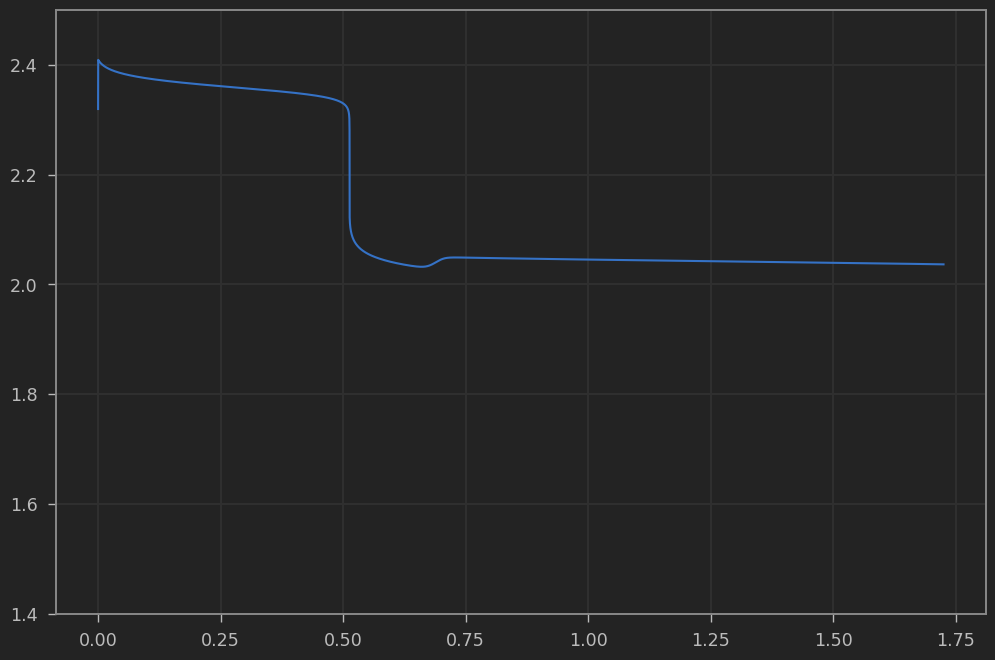

In [11]:
voltage = sim1.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim1.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [12]:
sim1.solution.t[-1]

18000.0

In [36]:
temp_data = []
temps = [ 302.15, 312.15]
for temp in temps:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
    current = 2.3*.15#/5
    hours = 10
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Precipitation rate [s-1]": 5,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.0,
            "Standard Potential L [V]": 2.0,
            "Standard Potential H [V]": 2.38,
            #"Ambient Temperature [K]" : temp
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim.solve(np.linspace(0, time_in_seconds, 100))
    temp_data.append(sim)

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 0 and h = 1.09456e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casad

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

ValueError: x and y must have same first dimension, but have shapes (13559,) and (1,)

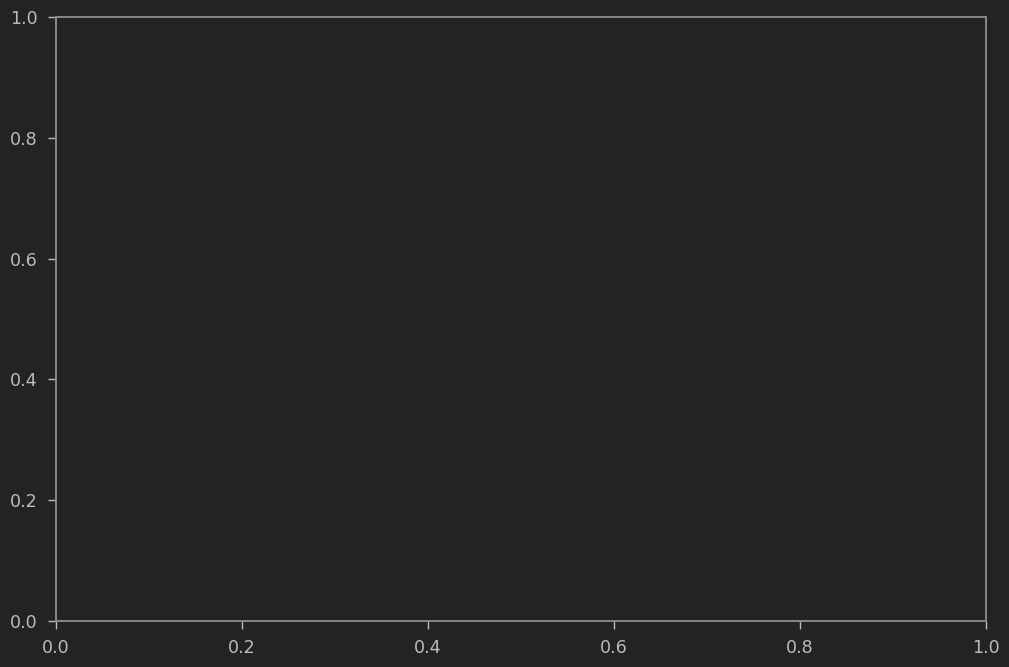

In [38]:
for sim in temp_data:
    voltage = sim.solution["Terminal voltage [V]"]
    capacity = sim.solution.t*current/3600
    plt.plot(capacity, voltage)
    
plt.legend(['20','30','40'])
notify

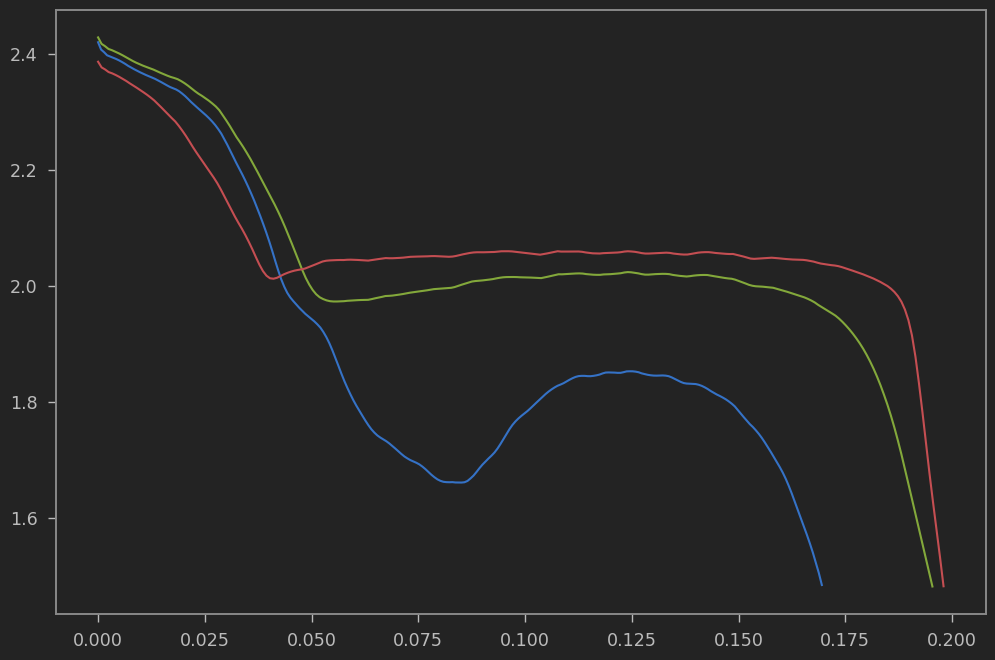

In [32]:
# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

temp_list = list(discharge_data.keys())

plt.plot(discharge_data['20']['capacity'],discharge_data['20']['internal voltage'])
plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])
plt.plot(discharge_data['40']['capacity'],discharge_data['40']['internal voltage'])

In [59]:
S8_initial_g = S8_initial
S6_initial_g = S6_initial
S4_initial_g = S4_initial
S2_initial_g = S2_initial
S1_initial_g = S_initial
Sp_initial_g = Sp_initial

# the total active material mass
m_s = S8_initial_g + S6_initial_g + S4_initial_g + S2_initial_g + S1_initial_g + Sp_initial_g

# get the mass fractions of the initial conditions
S8_initial_frac = S8_initial_g/m_s
S6_initial_frac = S6_initial_g/m_s
S4_initial_frac = S4_initial_g/m_s
S2_initial_frac = S2_initial_g/m_s
S1_initial_frac = S1_initial_g/m_s
Sp_initial_frac = Sp_initial_g/m_s

# set new total activate material mass to give Hunt's 0.211 Ah cell capacity
m_s_hunt = .168

# define the current for later simulations
current = 0.0211*2

# define discharge time in seconds for later simulations
hours = 10/2
time_in_seconds = hours*3600

S8_initial_hunt = S8_initial_frac*m_s_hunt
S6_initial_hunt = S6_initial_frac*m_s_hunt
S4_initial_hunt = S4_initial_frac*m_s_hunt
S2_initial_hunt = S2_initial_frac*m_s_hunt
S1_initial_hunt = S1_initial_frac*m_s_hunt
Sp_initial_hunt = Sp_initial_frac*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [64]:
model = pybamm.lithium_sulfur.MarinescuEtAl2016_S6()
current = 2*0.0211
hours = 1
time_in_seconds = hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for Terminal Voltage [V]": 2.4,#discharge_initial_data[0],
        "Initial Condition for S8 ion [g]": discharge_initial_data[1] ,
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3] ,
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Precipitation rate [s-1]": 5,
        "Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential H [V]": 2.35,
        #"Ambient Temperature [K]" : temp
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim.solve(np.linspace(0, time_in_seconds, 100))


psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

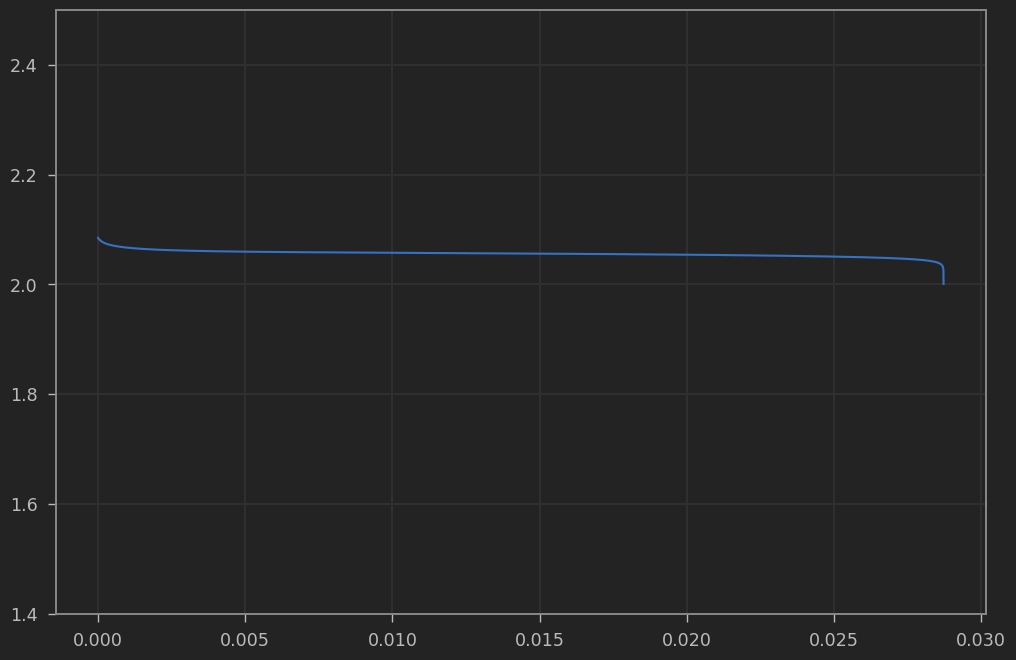

In [65]:
voltage = sim.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

In [63]:
indices = np.where(voltage <= 2.4)

loc = indices[0][1]

In [58]:
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[loc]
S6_initial = sim1.solution['S6 [g]'].entries[loc]
S4_initial = sim1.solution['S4 [g]'].entries[loc]
S2_initial = sim1.solution['S2 [g]'].entries[loc]
S_initial = sim1.solution['S [g]'].entries[loc]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial = sim1.solution['Terminal voltage [V]'].entries[loc]

In [22]:
# Marinescu et al. OG run
try:
    model = pybamm.lithium_sulfur.MarinescuEtAl2016_ks_temp()
    current = 2.3*.15#/5
    hours = 5
    time_in_seconds = hours*3600
    # (similar) parameters should be the same as in Marinescu et al. (2018)
    # However, the  initial condition from charge appears to be the result of a discharge
    params = model.default_parameter_values
    params.update(
        {
            "Current function [A]": current,
            "Initial Condition for S8 ion [g]": S8_initial,
            "Initial Condition for S6 ion [g]": S6_initial,
            "Initial Condition for S4 ion [g]": S4_initial,
            "Initial Condition for S2 ion [g]": S2_initial,
            "Initial Condition for S ion [g]": S_initial,
            "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
            "Initial Condition for Terminal Voltage [V]": V_initial,
            "Precipitation rate [s-1]": 5,
            "Shuttle rate coefficient during discharge [s-1]": 0.0002,
            "Lower voltage cut-off [V]": 2.0,
            "Standard Potential L [V]": 2.05,
            "Standard Potential H [V]": 2.35,
            #"S saturation mass [g]": 1e-5,
            #"Electrolyte volume per cell [L]": 0.0114*.25
        }
    )
    params.process_model(model)
    sim2 = pybamm.Simulation(
        model,
        parameter_values=params,
        solver=pybamm.CasadiSolver(
            atol=1e-6, 
            rtol=1e-3, 
            extra_options_setup={"max_step_size": 0.1}, 
            max_step_decrease_count = 15,
            #root_method = 'lm',
            #root_tol = 1e-7, 
            #dt_max = 1e-7
        ),
    )
    sim2.solve(np.linspace(0, time_in_seconds, 100))
except:
    notify

At t = 1.85292 and h = 2.0481e-08, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 2.59149 and h = 1.92342e-08, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 5.15231 and h = 8.4649e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 5.55327 and h = 1.56796e-08, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 5.86585 and h = 9.43267e-09, the corrector convergence failed repeatedly or with |h| = hmin.
At t = 3.41142 and h = 2.0292e-09, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup fail

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


In [23]:
voltage = sim2.solution['Terminal voltage [V]'].entries
plt.plot(abs(current)*sim2.solution.t/3600,voltage)
plt.ylim([1.4,2.5])
plt.grid(True)
notify

TypeError: 'NoneType' object is not subscriptable